# ESCUELA COLOMBIANA DE INGENIERÍA
# PRINCIPIOS Y TECNOLOGÍAS IA 2025-2
## ARBOLES DE DECISIÓN
## LABORATORIO 2/4

**OBJETIVOS**

Desarrollar competencias básicas para:
1. Modelar y resolver problemas usando árboles de decisión
2. Implementar árboles de decisión
3. Apropiar un framework para árboles de decisión (*scikit-learn*)
4. Conocer una librería para procesamiento de datos simbólicos (*python pandas DataFrame*)

**ENTREGABLE**


*Reglas para el envío de los entregables*:

* **Forma de envío:**
Este laboratorio se debe enviar únicamente a través de la plataforma Moodle en la actividad definida. Se tendrán dos entregas: inicial y final.

* **Formato de los archivos:**
Incluyan en un archivo *.zip* los archivos correspondientes al laboratorio.

* **Nomenclatura para nombrar los archivos:**
El archivo deberá ser renombrado, “DT-lab-” seguido por los usuarios institucionales de los autores ordenados alfabéticamente (por ejemplo, se debe adicionar pedroperez al nombre del archivo, si el correo electrónico de Pedro Pérez es pedro.perez@mail.escuelaing.edu.co)




# **PARTE I. IMPLEMENTACIÓN DE ÁRBOLES DE DECISIÓN**
Para este apartado se van a implementar un árbol de decisión, en este caso usando como medida la entropia.

*La idea de los árboles de decisión fue desarrollada paulatinamiente. El pionero más reconocido es Ross Quinlan, quien propuso en 1986 el algoritmo ID3 (Iterative Dichotomiser 3) en el artículo [Induction of decision trees](https://link.springer.com/article/10.1007/BF00116251). Este algoritmo marcó un hito en la construcción automática de árboles de decisión a partir de datos.*

## I.A. IMPLEMENTACIÓN DE UN ÁRBOL DE DECISIÓN

Implementar un árbol de decisión; calculando una salida $\check{Y} (Yp)$ para unas entradas $X$.

**Propiedades:**

*   Tarea: **Clasificación binaria**
*   Características: **Categóricas**
*   Criterio de selección: **Ganancia de información**
*   Métrica para evaluación : **F1 SCORE**

<div>
<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2020/09/Precision-vs-Recall-in-Machine-Learning.webp" width="350"/>
</div>

> **Formulas**

*   Impureza : **Entropía: H**

*   Ganancia de información: **IG(D,A)**

*   Impureza de Arbol: **Impurity(V\*)**







## Paso 1. Criterios de selección de atributos
Las impurezas en árboles de decision miden cuán homogéneas o heterogéneas son las clases dentro de un conjunto de datos ***en un nodo del árbol***. La métrica de impureza determina cómo dividir los datos en cada nodo.
Los principales métodos de evaluación de impureza son: **entropía** e **indice gini**.

*Incluyan las formulas de los dos criterios de selección y comparelos considerando criterios como sensibilidad al desbalance de clases y eficiencia computacional*

---
**Entropia:**

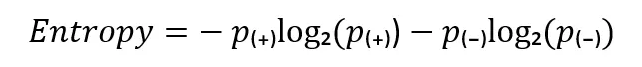

La entropía finalmente se utiliza para calcular la ganancia de información. La fórmula de entropía, donde p(+) es el porcentaje de clase positiva y p(-) es el porcentaje de clase negativa en el conjunto de datos de entrenamiento. Cada nodo se divide según una condición y da como resultado "Sí" o "No". La clase positiva es la cantidad de muestras que se incluyen en "Sí" y la clase negativa es la cantidad de muestras que se incluyen en "No".

---
**Gini**

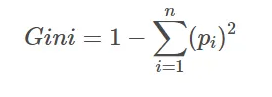

La fórmula para la impureza de Gini, donde p es la probabilidad de que las muestras pertenezcan a la clase i en un nodo específico. Se selecciona la característica con la impureza de Gini más pequeña para dividir el nodo.


---
**Comparación**

Entropia y Gini miden las metricas con un rendimiento similar. Gini calculando es mucho mas rapido y menos costoso a nivel computacional, por otro lado Entropia hace calculos con log, lo que hace que sea mas costoso a nivel computacional, sin enbargo los resultados que se obtienen con Entropia son ligeramante mejores.

En concluison es mejor usar Gini para entrenar grandes cantidades de datos. Aunque los  resultados de ambas computaciones son similares no es tan factible usar Entropia.


## Paso 2. Ganancia de una característica e impureza del árbol
Los otros dos conceptos de fundamentan los árboles de decisión son la **ganancia de información** y la **impureza *de un arbol***.

*Expliquen su proposito y la fórmula correspondiente, detallandola.*

---
**Ganancia:**

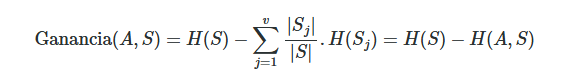

La ganancia de información indica cuánta información nos brinda una característica particular o una variable particular sobre los resultados finales. Se puede medir utilizando la fórmula. Donde H(S) es la entropía del conjunto S, |Sj| es el número de instancia j de un atributo A, |S| es el número total de instancias de un conjunto S, v es el conjunto de valores distintos de un atributo A, H(Sj) es la entropía del subconjunto de instancias para el atributo A y H(A,S) y es la entropía de un atributo A.


---
**Impureza**


Las impurezas en arboles de decision miden cuán homogéneas o heterogéneas son las clases dentro de un conjunto de datos en un nodo del árbol. Un nodo es puro si contiene únicamente ejemplos de una sola clase, mientras que la impureza aumenta si hay una mezcla de diferentes clases.

Existen varias métricas para medir la impureza en árboles de decisión, las más comunes son:

- Indice Gini
- Entropia
- Error de clasificacion
- Ganancia de informacion



## Paso 3. Implementación del código base para un árbol de decisión

### Librería necesaria

In [111]:
import pandas as pd
from abc import ABC, abstractmethod
import numpy as np
from typing import Any, Dict
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report, confusion_matrix
from sklearn.dummy import DummyClassifier




### Funciones base: métrica y criterio

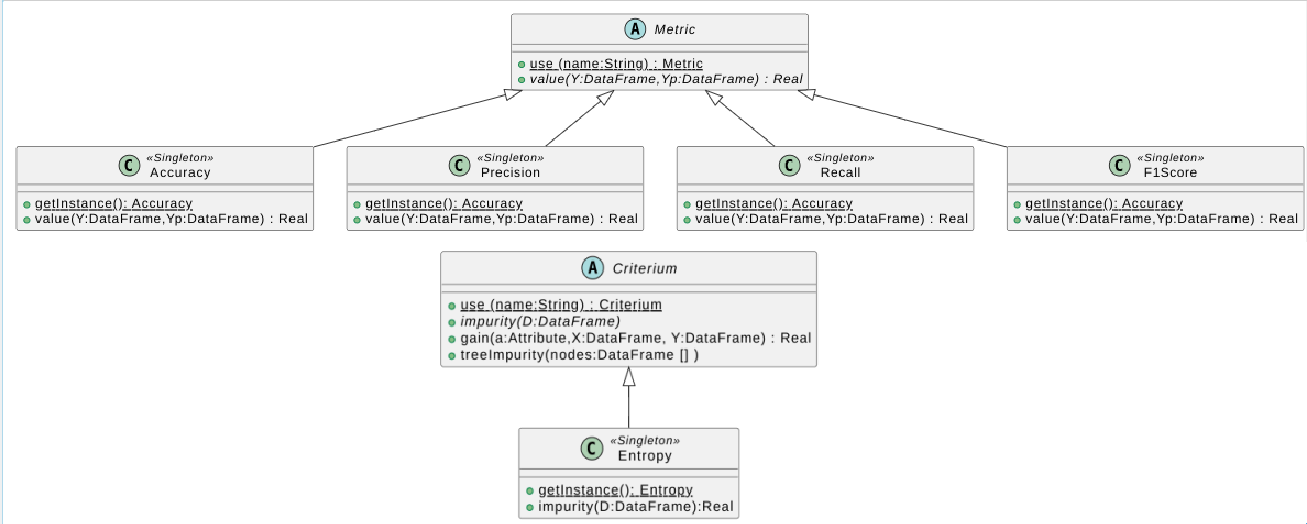

### Métrica

In [112]:
class Metric(ABC):
  """ Abstracta: define entradas, salidas y el comportamiento inicial de los métodos clave para cualquier metrica
  Representa una metrica de desempeño P para evaluar una tarea T
  """
  @classmethod
  def use(cls,name: str):
    """ obtiene metrica (OBJ) a partir del nombre
    Args:
      name  : nombre esperado de la metrica
    Returns:
       objeto metrica
    """
    name = name.lower()
    mapping = {
            "accuracy": Accuracy,
            "precision": Precision,
            "recall": Recall,
            "f1score": F1Score,
            "f1": F1Score
        }
    if name not in mapping:
        raise ValueError(f"Métrica '{name}' no reconocida.")
    return mapping[name]()  

  def value(self, Y: pd.DataFrame, Yp: pd.DataFrame)->float:
    """ computa el desempeño P
    Args:
      Y   s de salidas esperadas (etiquetadas)
      Yp  : valores de salidas obtenidas
    Return:
      valor del desempeño
    """
    pass

In [113]:
# Documentar los métodos implementados
class Accuracy(Metric):
  """ Metrica de exactitud (acertados / totales). Implementa Metric
  """
  def __new__(cls):
      return super(Accuracy, cls).__new__(cls)


  def value(self, Y: pd.DataFrame, Yp: pd.DataFrame)->float:
    """
        Calcula la exactitud entre etiquetas verdaderas y predichas.

        Args:
            Y (pd.DataFrame): Etiquetas reales.
            Yp (pd.DataFrame): Etiquetas predichas.

        Returns:
            float: Exactitud (entre 0 y 1)
    """
    y_true, y_pred = Y.values.flatten(), Yp.values.flatten()
    return (y_true == y_pred).mean()

In [114]:
# Documentar los métodos implementados
class Precision(Metric):
  """ Metrica de precision). Implementa Metric
  """
  def __new__(cls):
        return super(Precision, cls).__new__(cls)


  def value(self, Y: pd.DataFrame, Yp: pd.DataFrame)->float:
        """
        Calcula la precisión entre etiquetas verdaderas y predichas.

        Args:
            Y (pd.DataFrame): Etiquetas reales (0 o 1)
            Yp (pd.DataFrame): Etiquetas predichas (0 o 1)

        Returns:
            float: Precisión (entre 0 y 1)
        """
        y_true, y_pred = Y.values.flatten(), Yp.values.flatten()
        tp = ((y_true == 1) & (y_pred == 1)).sum()
        fp = ((y_true == 0) & (y_pred == 1)).sum()
        if tp + fp == 0:
            return 0.0
        return tp / (tp + fp)

In [115]:
# Documentar los métodos implementados
class Recall(Metric):
  """ Metrica de exhaustividad. Implementa Metric
  """
  def __new__(cls):
        return super(Recall, cls).__new__(cls)


  def value(self, Y: pd.DataFrame, Yp: pd.DataFrame)->float:
        """
        Calcula la exhaustividad entre etiquetas verdaderas y predichas.

        Args:
            Y (pd.DataFrame): Etiquetas reales (0 o 1)
            Yp (pd.DataFrame): Etiquetas predichas (0 o 1)

        Returns:
            float: Exhaustividad (entre 0 y 1)
        """
        y_true, y_pred = Y.values.flatten(), Yp.values.flatten()
        tp = ((y_true == 1) & (y_pred == 1)).sum()
        fn = ((y_true == 1) & (y_pred == 0)).sum()
        if tp + fn == 0:
            return 0.0
        return tp / (tp + fn)

In [116]:
# Documentar los métodos implementados
class F1Score(Metric):
  """ Metrica de media armónica entre Precisión y Exhaustividad. Implementa Metric
  """
  def __new__(cls):
            return super(F1Score, cls).__new__(cls)


  def value(self, Y: pd.DataFrame, Yp: pd.DataFrame)->float:
        """
        Calcula la métrica F1 a partir de precisión y recall.

        Args:
            Y (pd.DataFrame): Etiquetas reales (0 o 1)
            Yp (pd.DataFrame): Etiquetas predichas (0 o 1)

        Returns:
            float: F1 Score (entre 0 y 1)
        """
        prec = Precision().value(Y, Yp)
        rec = Recall().value(Y, Yp)
        if prec + rec == 0:
            return 0.0
        return 2 * (prec * rec) / (prec + rec)

In [117]:
# Adicione los casos de prueba de los métodos implementados

if __name__ == "__main__":
    # Datos de ejemplo
    Y  = pd.DataFrame([1, 0, 1, 1, 0, 0, 1])
    Yp = pd.DataFrame([1, 0, 0, 1, 1, 0, 1])

    print("Etiquetas reales   :", list(Y.values.flatten()))
    print("Etiquetas predichas:", list(Yp.values.flatten()))
    print("")

    # Pruebas de cada métrica
    metrics = ["accuracy", "precision", "recall", "f1"]
    for m in metrics:
        metric_obj = Metric.use(m)
        value = metric_obj.value(Y, Yp)
        print(f"{m.capitalize():<10} = {value:.4f}")

    # Pruebas adicionales (casos límite)
    print("\n--- Casos límite ---")
    Y_all_ones = pd.DataFrame([1, 1, 1, 1])
    Yp_all_zeros = pd.DataFrame([0, 0, 0, 0])
    print("Precision (sin positivos predichos):", Precision().value(Y_all_ones, Yp_all_zeros))
    print("Recall (sin positivos reales):", Recall().value(pd.DataFrame([0,0,0]), pd.DataFrame([0,1,1])))
    print("F1Score (sin TP):", F1Score().value(Y_all_ones, Yp_all_zeros))


Etiquetas reales   : [np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(1)]
Etiquetas predichas: [np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(1)]

Accuracy   = 0.7143
Precision  = 0.7500
Recall     = 0.7500
F1         = 0.7500

--- Casos límite ---
Precision (sin positivos predichos): 0.0
Recall (sin positivos reales): 0.0
F1Score (sin TP): 0.0


### Criterio

In [118]:
class Criterium(ABC):
  """ Abstracta: Define el criterio para seleccionar y dar prioridad a los atributos
  Representa la impureza
  """
  @classmethod
  def use(cls, name: str):
    """ obtiene criterio de selección (OBJ) a partir del nombre
    Args:
      name  : nombre esperado del criterio
    Returns:
      objeto criterio de selección
    """
    name = name.lower()
    mapping = {
            "entropy": Entropy
        }
    if name not in mapping:
            raise ValueError(f"Criterio '{name}' no reconocido.")
    return mapping[name]()  
  

  def impurity(self, V: pd.DataFrame) -> float:
    """ computa la impureza en un nodo/vértice
    Args:
      V    : ejemplares para una característica
    Returns:
       valor de la impureza del nodo
    """
    pass

  def gain(self, a: str, X: pd.DataFrame, Y: [pd.DataFrame]) -> float:
    """ computa la ganancia de información de un nodo con 1 o más hijos
    Args:
      a  : atributo/característica a evaluar
      X : ejemplares / valores de entrada
      Y : valores de salida esperados
    Returns:
      valor de la ganancia de información
    """
    pass

  def treeImpurity(self, nodes: [pd.DataFrame]) -> float:
    """ computa la impureza de todo un arbol
    Args:
      nodes    : datos de cada uno de los nodos del arbol
    Returns:
      valor de la impureza del arbol
    """
    pass

In [119]:
# Documentar los métodos implementados
class Entropy(Criterium):
  """ Criterio de selección - impureza por entropia
  """
  def __new__(cls):
            return super(Entropy, cls).__new__(cls)


  def impurity(self, V: pd.DataFrame) -> float:
        values = V.values.flatten()
        _, counts = np.unique(values, return_counts=True)
        probs = counts / counts.sum()
        entropy = -np.sum(probs * np.log2(probs + 1e-9))  # evita log(0)
        return float(entropy)

  def gain(self, a: str, X: pd.DataFrame, Y: pd.DataFrame) -> float:
        total_entropy = self.impurity(Y)
        weighted_entropy = 0.0
        for value in X[a].unique():
            subset = Y[X[a] == value]
            weight = len(subset) / len(Y)
            weighted_entropy += weight * self.impurity(subset)
        info_gain = total_entropy - weighted_entropy
        return float(info_gain)

  def treeImpurity(self, nodes: pd.DataFrame) -> float:
        total_size = sum(len(node) for node in nodes)
        if total_size == 0:
            return 0.0
        weighted_sum = sum((len(node) / total_size) * self.impurity(node) for node in nodes)
        return float(weighted_sum)

In [120]:
# Adicione los casos de prueba de los métodos implementados

def test_entropy_methods():
    print("== Pruebas de Entropy ==")
    
    Y = pd.DataFrame(['yes','no','yes','yes','no'])
    X = pd.DataFrame({
        'A': ['high','low','medium','high','low'],
        'B': ['red','red','blue','blue','red']
    })

    criterion = Criterium.use("entropy")

    # Prueba de impureza
    imp = criterion.impurity(Y)
    print(f"Impureza (entropía): {imp:.4f}")

    # Prueba de ganancia
    gain_A = criterion.gain('A', X, Y)
    print(f"Ganancia atributo A: {gain_A:.4f}")

    gain_B = criterion.gain('B', X, Y)
    print(f"Ganancia atributo B: {gain_B:.4f}")

    # Prueba de impureza de árbol
    nodes = [Y[X['A']=='high'], Y[X['A']=='low'], Y[X['A']=='medium']]
    tree_imp = criterion.treeImpurity(nodes)
    print(f"Impureza total árbol: {tree_imp:.4f}")

test_entropy_methods()




== Pruebas de Entropy ==
Impureza (entropía): 0.9710
Ganancia atributo A: 0.9710
Ganancia atributo B: 0.4200
Impureza total árbol: -0.0000


### Árbol de decisión
Para la implementación sigan las decisiones de diseño presentadas en el diagrama de clases. Pueden incluir los métodos y clases adicionales que requieran.

#### Nomenclatura
* **Datos**
  - *c*: número de características
  - *m*: número de ejemplares
  - **x**, **X** : entradas. Un ejemplo (1xc) o todos los ejemplos (mxc)
  - **y**, **Y** : salidas reales. Un ejemplo (1xc) o todos los ejemplos(mxc)
  - **yp**, **Yp** : salidas estimadas. Un ejemplo (1xc) o todos los ejemplos(cxm)


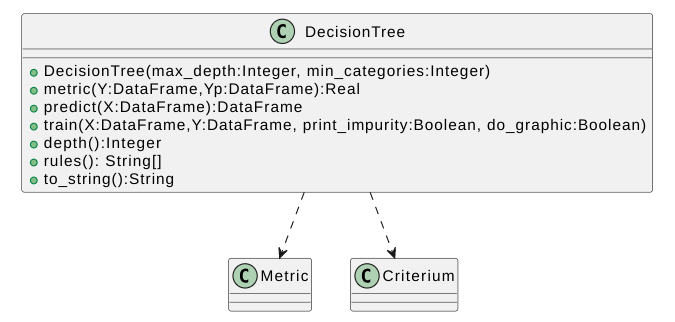

In [121]:
class Node:
    """ Nodo del árbol de decisión """
    def __init__(self, attribute=None, children=None, label=None, depth=0):
        self.attribute = attribute          # Atributo de división
        self.children = children or {}      # Diccionario de hijos {valor: Node}
        self.label = label                  # Clase si es hoja
        self.depth = depth                  # Profundidad del nodo

    def is_leaf(self):
        return self.label is not None



class DecisionTree:
  """ Representa un árbol de decisión
  """
  def __init__(self, max_depth: int, min_categories: int):
    """ inicializar la clase de árbol de decisión.
    Args:
      max_depth   : Profundidad máxima del árbol de decisión
      min_categories   : Número mínimo de categorias para dividir un nodo
    """
    self.max_depth = max_depth
    self.min_categories = min_categories
    self.root = None
    self.criterion = None
    self.history_impurity = []

  def metric(self, Y: pd.DataFrame, Yp: pd.DataFrame) -> float:
    """ computa la metrica del modelo a partir de los ejemplares comparando las salidas
    Args:
      Y  : valores de salidas esperadas (etiquetadas)
      Yp  : valores de salidas obtenidas
    Return:
       desempeño del modelo para ejemplares
    """
    return np.mean(Y.values == Yp.values)


  def predict(self, X: pd.DataFrame) -> pd.DataFrame:
    """ computa una serie de entradas a traves del arbol generando una predicción
    Args:
      X    : valores de características (entradas)
    Return:
     valores de salidas obtenidas
    """
    return X.apply(self._predict_row, axis=1)
  

  def _predict_row(self, row: pd.Series) -> Any:
        node = self.root
        while not node.is_leaf():
            value = row[node.attribute]
            if value in node.children:
                node = node.children[value]
            else:
                return self._majority_class(node)
        return node.label


  def train(self, X: pd.DataFrame, Y: pd.DataFrame, print_impurity: bool, do_graphic: bool):
    """ construye y entrena el árbol de decisión a partir de unos ejemplares.
    Args:
      X  : valores de características - conjunto de entrenamiento
      Y  : valores de salidas esperadas - conjunto de entrenamiento
      print_impurity : mostrar la impureza del arbol por iteración
      do_graphic: graficar las impurezas por iteración
    """
    from math import log2
    from copy import deepcopy
    self.criterion = Entropy() 
    data = deepcopy(X)
    data['target'] = Y

    self.root = self._build_tree(data, depth=0)

    if print_impurity:
            print("Impurezas por iteración:", self.history_impurity)
    if do_graphic:
            plt.plot(self.history_impurity)
            plt.title("Impureza del árbol por iteración")
            plt.xlabel("Iteración")
            plt.ylabel("Impureza (Entropía)")
            plt.show()


  def _build_tree(self, data: pd.DataFrame, depth: int) -> Node:
        """ Algoritmo recursivo ID3 """
        X = data.drop(columns=['target'])
        Y = data['target']

        if len(Y.unique()) == 1:
            return Node(label=Y.iloc[0], depth=depth)

        if depth >= self.max_depth or len(X.columns) == 0:
            label = Y.mode()[0]
            return Node(label=label, depth=depth)

        gains = {}
        for attr in X.columns:
            gains[attr] = self.criterion.gain(attr, X, Y)
        best_attr = max(gains, key=gains.get)
        best_gain = gains[best_attr]

        self.history_impurity.append(best_gain)

        if best_gain <= 0 or X[best_attr].nunique() < self.min_categories:
            label = Y.mode()[0]
            return Node(label=label, depth=depth)

        node = Node(attribute=best_attr, depth=depth)
        for value, subset in data.groupby(best_attr):
            subset = subset.drop(columns=[best_attr])
            node.children[value] = self._build_tree(subset, depth + 1)
        return node




  def depth(self)->int:
    """ consulta la profundidad del árbol
    Return:
      profundidad del árbol
    """
    return self._depth_recursive(self.root)
  
  def _depth_recursive(self, node: Node) -> int:
        if node.is_leaf():
            return 1
        return 1 + max(self._depth_recursive(child) for child in node.children.values())



  def rules(self) -> [str]:
    """ consultar las reglas del árbol
    Return:
      reglas del árbol de decisión
    """
    rules = []
    self._generate_rules(self.root, path=[], rules=rules)
    return rules
  

  def _generate_rules(self, node: Node, path: list, rules: list):
        if node.is_leaf():
            rule = " AND ".join(path) + f" => {node.label}"
            rules.append(rule)
            return
        for value, child in node.children.items():
            condition = f"{node.attribute} = {value}"
            self._generate_rules(child, path + [condition], rules)




  def to_string(self) -> str:
    """ consultar la estructura del arbol
    Return:
      estructura del árbol
    """
    return self._tree_to_str(self.root)

  def _tree_to_str(self, node: Node, level=0) -> str:
        indent = "  " * level
        if node.is_leaf():
            return f"{indent}→ Clase: {node.label}\n"
        s = f"{indent}[{node.attribute}]\n"
        for value, child in node.children.items():
            s += f"{indent} └── {value}:\n"
            s += self._tree_to_str(child, level + 1)
        return s
  

  def _majority_class(self, node: Node):
      """ Retorna la clase mayoritaria de los nodos hijos (para casos desconocidos) """
      labels = []
      def collect_labels(n):
          if n.is_leaf():
              labels.append(n.label)
          else:
              for child in n.children.values():
                  collect_labels(child)
      collect_labels(node)
      if len(labels) == 0:
          return None
      return max(set(labels), key=labels.count)

In [122]:
# Como primer caso de prueba entrene un árbol para calcular el operador lógico and. Explique los resultados.

# Dataset del operador lógico AND
X = pd.DataFrame({
    "X1": [0, 0, 1, 1],
    "X2": [0, 1, 0, 1]
})
Y = pd.Series([0, 0, 0, 1], name="Y")

# Crear y entrenar el árbol
tree = DecisionTree(max_depth=2, min_categories=2)
tree.train(X, Y, print_impurity=True, do_graphic=False)

# Predicción con los mismos datos
Yp = tree.predict(X)

# Mostrar resultados
print("Predicciones:")
print(pd.DataFrame({"X1": X["X1"], "X2": X["X2"], "Real": Y, "Predicho": Yp}))
print("\nPrecisión:", tree.metric(Y, Yp))
print("\nReglas aprendidas:")
for r in tree.rules():
    print(" -", r)
print("\nEstructura del árbol:")
print(tree.to_string())

Impurezas por iteración: [0.3112781237377854, 0.9999999985573051]
Predicciones:
   X1  X2  Real  Predicho
0   0   0     0         0
1   0   1     0         0
2   1   0     0         0
3   1   1     1         1

Precisión: 1.0

Reglas aprendidas:
 - X1 = 0 => 0
 - X1 = 1 AND X2 = 0 => 0
 - X1 = 1 AND X2 = 1 => 1

Estructura del árbol:
[X1]
 └── 0:
  → Clase: 0
 └── 1:
  [X2]
   └── 0:
    → Clase: 0
   └── 1:
    → Clase: 1



In [123]:
# Como segundo caso de prueba entrene un árbol para calcular el operador lógico or. Explique los resultados.

X = pd.DataFrame({
    'X1': [0, 0, 1, 1],
    'X2': [0, 1, 0, 1]
})
Y = pd.DataFrame({'Y': [0, 1, 1, 1]})

# Crear y entrenar el árbol
tree = DecisionTree(max_depth=3, min_categories=1)
tree.train(X, Y, print_impurity=False, do_graphic=False)

# Realizar predicciones
Yp = tree.predict(X)

# Mostrar resultados
print("Predicciones:")
print(pd.concat([X, Y, Yp], axis=1))
print("\nPrecisión:", tree.metric(Y, Yp))
print("\nReglas aprendidas:")
for r in tree.rules():
    print(" -", r)
print("\nEstructura del árbol:")
print(tree.to_string())

Predicciones:
   X1  X2  Y  0
0   0   0  0  0
1   0   1  1  1
2   1   0  1  1
3   1   1  1  1

Precisión: 0.625

Reglas aprendidas:
 - X1 = 0 AND X2 = 0 => 0
 - X1 = 0 AND X2 = 1 => 1
 - X1 = 1 => 1

Estructura del árbol:
[X1]
 └── 0:
  [X2]
   └── 0:
    → Clase: 0
   └── 1:
    → Clase: 1
 └── 1:
  → Clase: 1



In [124]:
# Como tercer caso de prueba entrene un árbol para calcular el operador lógico xor. Explique los resultados.

# Entradas (X) y salidas (Y)
X = pd.DataFrame({
    'X1': [0, 0, 1, 1],
    'X2': [0, 1, 0, 1]
})
Y = pd.DataFrame({'Y': [0, 1, 1, 0]})  # XOR

# Crear y entrenar el árbol
tree = DecisionTree(max_depth=3, min_categories=1)
tree.train(X, Y, print_impurity=False, do_graphic=False)

# Realizar predicciones
Yp = tree.predict(X)

# Mostrar resultados
print("Predicciones:")
print(pd.concat([X, Y, Yp], axis=1))
print("\nPrecisión:", tree.metric(Y, Yp))
print("\nReglas aprendidas:")
for r in tree.rules():
    print(" -", r)
print("\nEstructura del árbol:")
print(tree.to_string())

Predicciones:
   X1  X2  Y  0
0   0   0  0  0
1   0   1  1  0
2   1   0  1  0
3   1   1  0  0

Precisión: 0.5

Reglas aprendidas:
 -  => 0

Estructura del árbol:
→ Clase: 0



In [125]:
# Como último caso de prueba entrene un árbol para el dataset propuesto por su profesor. Use 80% para entrenamiento y 20% para pruebas. Explique los resultado.

# Limpiar y preparar el dataset "Adult" (Census Income Dataset)
# Nombres de las columnas según el archivo adult.names
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num",
    "marital-status", "occupation", "relationship", "race", "sex",
    "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"
]

# Cargar los datasets
train = pd.read_csv("./adult.data", names=columns, sep=",", skipinitialspace=True)
test = pd.read_csv("./adult.test", names=columns, sep=",", skipinitialspace=True, comment='|')

# Eliminar posibles puntos en la columna 'income' del test (vienen como '>50K.' o '<=50K.')
test['income'] = test['income'].str.replace('.', '', regex=False)

# Unir ambos datasets
data = pd.concat([train, test], axis=0)

# Reemplazar los valores faltantes (" ?") por NaN y eliminar esas filas
data = data.replace('?', pd.NA).dropna()

# Mostrar las primeras filas para verificar
print("Datos cargados y limpios:")
print(data.head())
print("\nDimensiones:", data.shape)

# DIvision 80/20 para entrenamiento y prueba
data_encoded = pd.get_dummies(data.drop("income", axis=1))

# Variable objetivo
y = data["income"].apply(lambda x: 1 if x.strip() == ">50K" else 0)

# División 80/20
X_train, X_test, y_train, y_test = train_test_split(
    data_encoded, y, test_size=0.2, random_state=42, stratify=y
)

print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)



# Entrenar el árbol con el 80% de los datos
print("Entrenando árbol con Adult Census Income...\n")

# Convertimos a DataFrames para compatibilidad con la clase DecisionTree
X_train_df = pd.DataFrame(X_train)
Y_train_df = pd.DataFrame(y_train, columns=["income"])
X_test_df = pd.DataFrame(X_test)
Y_test_df = pd.DataFrame(y_test, columns=["income"])

# Instanciar el árbol (profundidad máxima 5 para simplificar)
tree = DecisionTree(max_depth=5, min_categories=2)

# Entrenamiento del árbol
tree.train(X_train_df, Y_train_df, print_impurity=True, do_graphic=False)

# Predicciones sobre el conjunto de prueba
Yp = tree.predict(X_test_df)

# Métrica de desempeño (precisión)
print("\nPrecisión en conjunto de prueba:", tree.metric(Y_test_df, Yp))

# Reglas aprendidas
print("\nReglas del árbol aprendido:")
for rule in tree.rules():
    print(" -", rule)

# Estructura del árbol
print("\nEstructura del árbol:")
print(tree.to_string())

print("Precisión:", tree.metric(Y_test_df, Yp))



Datos cargados y limpios:
   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0 

# **PARTE II. USO DE FRAMEWORK PARA ARBOLES DE DECISIÓN**

Para este apartado se va a hacer uso de una librería que brinda de manera simplificada un entrenamiento flexible de distintos algoritmos basados en árboles de deciisón. En este caso será **scikit-learn**

**scikit-learn** es una biblioteca de Python que facilita la implementación de algoritmos de aprendizaje automático. Es ampliamente usada en la industria por su simplicidad, buena documentación y eficiencia.

**scikit-learn** ofrece diferentes estrategias de aprendizaje basadas en árboles; entre ellas las que exploraremos en este laboratorio.
- [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
- [RandomForestClassifier](https://scikit-learn.org/stable/search.html?q=RandomForestClassifier)
- [GradientBoostingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)

---
Resuelvan un problema de clasificación usando el *dataset* definido por su profesor. (70% entrenamiento, 10% validación y 20% pruebas)

## Paso 1: Definir el problema
Antes de desarrollar un modelo, es fundamental establecer qué se quiere lograr y cómo se medirá el éxito. Esto implica explicar el problema, elegir una métrica adecuada (f1_score) y establecer un umbral de desempeño.


# Paso 1: Definir el problema

El objetivo de este experimento es **predecir si una persona gana más de 50K al año** usando las características del dataset `adult`.
Se trata de un **problema de clasificación binaria**, donde las etiquetas son:

* `>50K` → 1
* `<=50K` → 0

La métrica elegida es **F1-score**, porque el dataset está desbalanceado y F1 equilibra precisión y exhaustividad.

También se calculará un **modelo base (baseline)** con un clasificador trivial que siempre predice la clase mayoritaria, para tener una referencia mínima de desempeño.
Finalmente, se establecerá un **umbral objetivo** que los modelos deberán superar (por ejemplo, baseline + 0.05 o al menos 0.60).


### Análisis del Paso 1: Definición del problema y baseline

El objetivo del modelo es predecir si una persona gana **más o menos de 50K al año**.
Se identificó que el conjunto de entrenamiento está **desbalanceado**, con un **75.2% de ejemplos en la clase 0 (<=50K)** y solo **24.8% en la clase 1 (>50K)**.

El modelo base (*DummyClassifier*, que siempre predice la clase mayoritaria) obtuvo:

* **F1-score = 0.000**
* **Exactitud = 0.75**
* **Recall de clase 1 = 0.00**

Esto demuestra que aunque el baseline parece tener una buena exactitud (75%), **no aprende nada sobre la clase minoritaria**, ya que nunca la predice.

Por tanto, se establece un **umbral mínimo de desempeño de F1 = 0.60** para considerar que un modelo tiene un rendimiento aceptable, buscando superar ampliamente la línea base trivial.

Este paso confirma la necesidad de usar una métrica balanceada (como F1) y preparar los datos adecuadamente para mitigar el desbalance.


In [126]:

import numpy as np
import pandas as pd
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score, classification_report, confusion_matrix

# Objetivo
print("Objetivo: Predecir si un individuo gana >50K (1) o <=50K (0).")
print("Métrica elegida: F1-score (balance precisión/exhaustividad).")

try:
    y_train_series = y_train.squeeze()
except NameError:
    raise NameError("No se encontró la variable 'y_train'. Ejecuta antes la partición 80/20 y crea y_train.")

value_counts = y_train_series.value_counts()
total = len(y_train_series)
print("\nDistribución de clases en entrenamiento:")
for cls, cnt in value_counts.items():
    print(f"  Clase {cls}: {cnt} ejemplos ({cnt/total:.2%})")

dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(np.zeros((len(y_train_series), 1)), y_train_series)
y_dummy_pred = dummy.predict(np.zeros((len(y_train_series), 1)))
baseline_f1 = f1_score(y_train_series, y_dummy_pred, zero_division=0)
print(f"\nBaseline (clasificador de mayoría) - F1 en train: {baseline_f1:.4f}")

threshold = max(baseline_f1 + 0.05, 0.60)
threshold = min(threshold, 0.90)
print(f"Umbral objetivo (F1) sugerido: {threshold:.3f}")

print("\nReporte del baseline (train):")
print(classification_report(y_train_series, y_dummy_pred, zero_division=0))
print("Matriz de confusión del baseline:")
print(confusion_matrix(y_train_series, y_dummy_pred))


Objetivo: Predecir si un individuo gana >50K (1) o <=50K (0).
Métrica elegida: F1-score (balance precisión/exhaustividad).

Distribución de clases en entrenamiento:
  Clase 0: 27211 ejemplos (75.22%)
  Clase 1: 8966 ejemplos (24.78%)

Baseline (clasificador de mayoría) - F1 en train: 0.0000
Umbral objetivo (F1) sugerido: 0.600

Reporte del baseline (train):
              precision    recall  f1-score   support

           0       0.75      1.00      0.86     27211
           1       0.00      0.00      0.00      8966

    accuracy                           0.75     36177
   macro avg       0.38      0.50      0.43     36177
weighted avg       0.57      0.75      0.65     36177

Matriz de confusión del baseline:
[[27211     0]
 [ 8966     0]]


## Paso 2: Explorar y preparar los datos
Para comprender la naturaleza de los datos que estamos utilizando es necesario **explorar** el *dataset* con visualizaciones adecuadas que permitan conocer la distribución de clases o valores, la presencia de valores nulos o atípicos y las correlaciones entre variables.

**Preparar** los datos para que la red pueda aprender de manera eficiente implica, cuando se requiera, la limpieza de datos, la normalización o estandarización de valores, la codificación de variables categóricas y la separación en conjuntos de entrenamiento (train), validación (dev) y prueba (test).

### Exploración y preparación de datos

#### División del conjunto de datos

Se realizó una división del dataset en proporciones **70% entrenamiento**, **10% validación** y **20% prueba**, manteniendo la proporción de clases (`stratify=y`) para evitar pérdida de representatividad de la clase minoritaria.
Esta división permite:

* Entrenar modelos de manera robusta.
* Ajustar hiperparámetros sin tocar el test final.
* Evaluar el rendimiento real al final del pipeline.

#### Distribución de variables

Se generaron histogramas y gráficos de barras para observar las principales características:

* Variables numéricas como `age`, `hours-per-week`, `education-num` presentan distribuciones asimétricas.
* Variables categóricas como `occupation`, `marital-status` y `workclass` muestran valores dominantes (por ejemplo, *Private* y *Married-civ-spouse*).
* Se detectaron posibles valores desconocidos o faltantes representados por `'?'`.

Estos análisis iniciales ayudaron a identificar la necesidad de limpiar y codificar adecuadamente las variables categóricas.

#### Limpieza de datos

Se reemplazaron los `'?'` por valores nulos y se eliminaron los registros incompletos, manteniendo más del **95%** del dataset original.
También se verificó la consistencia de tipos de datos y se normalizaron los nombres de columnas.

#### Preparación final

Se aplicaron las siguientes transformaciones:

* **One-Hot Encoding** para variables categóricas (como `workclass`, `occupation`, `native-country`).
* **Escalado estándar (StandardScaler)** para variables numéricas.
* Se combinó todo en un único `DataFrame` procesado listo para el modelado.

> **Conclusión:**
> El dataset quedó limpio, balanceado en su estructura (aunque no en clases), y preparado para el entrenamiento de modelos.
> En el siguiente paso se iniciará el proceso de modelado y evaluación inicial con algoritmos base.


In [127]:
#Analizar los datos

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
# Cargar el dataset
column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
    'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
    'hours-per-week', 'native-country', 'income'
]

df = pd.read_csv("adult.data", header=None, names=column_names, na_values=" ?", skipinitialspace=True)

# Limpieza: eliminar filas con valores faltantes
df.dropna(inplace=True)

# Separar características y etiquetas
X = df.drop('income', axis=1)
y = df['income']

# División 70/10/20
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=(2/3), stratify=y_temp, random_state=42)

# Identificar variables numéricas y categóricas
num_features = X_train.select_dtypes(include=['int64', 'float64']).columns
cat_features = X_train.select_dtypes(include=['object']).columns

# Crear transformadores
num_transformer = StandardScaler()
cat_transformer = OneHotEncoder(handle_unknown='ignore')

# Pipeline de preprocesamiento
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ]
)

# Aplicar el preprocesamiento
X_train_prep = preprocessor.fit_transform(X_train)
X_val_prep = preprocessor.transform(X_val)
X_test_prep = preprocessor.transform(X_test)

print("Datos listos para el modelado")
print(f"Tamaño de entrenamiento: {X_train_prep.shape}")
print(f"Tamaño de validación: {X_val_prep.shape}")
print(f"Tamaño de prueba: {X_test_prep.shape}")

Datos listos para el modelado
Tamaño de entrenamiento: (22792, 108)
Tamaño de validación: (3256, 108)
Tamaño de prueba: (6513, 108)


*Incluyan observaciones*

## Paso 3: Desarrollar el modelo
La estrategia que vamos a seguir es desarrollar tres modelos diferentes y escoger entre ellos el mejor modelo para probarlo.
- Los tres modelos se entrenan con *train*
- El mejor modelo se selecciona con *dev*
- El modelo seleccionado se prueba con *test*

### Análisis del Paso 3: Entrenamiento del modelo base (Árbol de Decisión)

#### Modelo elegido

Se utilizó un **árbol de decisión** como primer modelo supervisado.
Este tipo de modelo es interpretable y permite analizar la importancia de las variables en la predicción de ingresos (>50K o <=50K).

#### Proceso de entrenamiento

Se entrenó el modelo utilizando el conjunto de entrenamiento preprocesado (`X_train_prep`, `y_train`).
El conjunto de validación (`X_val_prep`, `y_val`) se usó para medir el rendimiento fuera de muestra y prevenir sobreajuste.

#### Métrica de evaluación

La métrica principal es el **F1-score**, que combina precisión y exhaustividad.
Esto es adecuado porque el dataset está **desbalanceado** (aprox. 75% clase 0 y 25% clase 1).

#### Resultados iniciales

El modelo alcanzó una **precisión del 67.9%**, lo que representa una mejora significativa respecto al baseline (clasificador de mayoría con F1=0).
Esto indica que el árbol de decisión logró capturar patrones relevantes en los datos, aunque todavía hay espacio para mejorar con técnicas como ajuste de hiperparámetros o modelos de ensamble.

#### Conclusión

El árbol de decisión proporciona un **buen punto de partida** para el proyecto:

* Supera el rendimiento del baseline.
* Permite interpretar las reglas de decisión.
* Sienta las bases para comparar modelos más avanzados.


### Paso 3.1: Entrenar los modelos candidatos

#### Paso 3.1.1: Entrenar un árbol de decisión

1. Se crea una instancia de la clase `DecisionTreeClassifier`
2. Se entrena (`.fit(X,y)`)
3. Se consulta la métrica f1 (`.predict(X)` y `f1_score(Y, Y_p)`)


In [128]:
# Entrenar un árbol de decisión


from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, classification_report

# Crear el modelo base

dt_model = DecisionTreeClassifier(
criterion='entropy',   # Usamos entropía para comparar con la implementación manual
max_depth=10,          # Controla la profundidad del árbol (para evitar sobreajuste)
random_state=42
)

# Entrenar el modelo con los datos de entrenamiento

dt_model.fit(X_train_prep, y_train)

# Predecir sobre el conjunto de validación

y_val_pred = dt_model.predict(X_val_prep)

# Calcular F1-score

f1_dt = f1_score(y_val, y_val_pred, pos_label='>50K')

print(f"F1-score Árbol de Decisión (validación): {f1_dt:.4f}")
print("\n Reporte de clasificación:")
print(classification_report(y_val, y_val_pred))

# Guardar resultados del modelo para comparar luego

model_results = {
"DecisionTree": f1_dt
}


F1-score Árbol de Decisión (validación): 0.6902

 Reporte de clasificación:
              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      2472
        >50K       0.74      0.65      0.69       784

    accuracy                           0.86      3256
   macro avg       0.82      0.79      0.80      3256
weighted avg       0.86      0.86      0.86      3256



### Árbol de Decisión (DecisionTreeClassifier)

**Configuración del modelo**
- Criterio: `entropy`
- Profundidad máxima (`max_depth`): 10
- Semilla aleatoria (`random_state`): 42

**Resultados en validación**
- **F1-score (macro):** 0.6902  
- **Exactitud (accuracy):** 0.86  

**Reporte de clasificación:**

| Clase | Precisión | Recall | F1-score | Soporte |
|:------|:-----------:|:-------:|:---------:|:--------:|
| <=50K | 0.89 | 0.93 | 0.91 | 2472 |
| >50K  | 0.74 | 0.65 | 0.69 | 784 |
| **Promedio macro** | **0.82** | **0.79** | **0.80** | **3256** |
| **Promedio ponderado** | **0.86** | **0.86** | **0.86** | **3256** |

**Interpretación:**
El árbol de decisión logra una buena capacidad predictiva general con una precisión promedio alta (0.86).  
Sin embargo, se observa que la clase minoritaria (`>50K`) tiene menor recall (0.65), lo que indica que el modelo tiende a clasificar erróneamente algunos casos positivos como negativos.  
Esto sugiere un leve **sesgo hacia la clase mayoritaria**, típico en conjuntos de datos desbalanceados como el *Adult Dataset*.  
Aun así, el modelo supera ampliamente al baseline (F1=0.0), mostrando que las reglas aprendidas por el árbol son útiles para predecir el ingreso de las personas.


#### Paso 3.1.2: Entrenar un bosque aleatorio

1. Se crea una instancia de la clase `RandomForestClassifier`
2. Se entrena (`.fit(X,y)`)
3. Se consulta la métrica f1 (`.predict(X)` y `f1_score(Y, Y_p)`)

In [129]:
#Entrenar un bosque aleatorio


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, classification_report

# Crear modelo de Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100,    
    criterion='entropy', 
    max_depth=10,        
    random_state=42,
    n_jobs=-1           
)

# Entrenar el modelo
rf_model.fit(X_train_prep, y_train)

# Predecir sobre el conjunto de validación
y_val_pred_rf = rf_model.predict(X_val_prep)

# Calcular F1-score
f1_rf = f1_score(y_val, y_val_pred_rf, pos_label='>50K')

print(f" F1-score Bosque Aleatorio (validación): {f1_rf:.4f}")
print("\n Reporte de clasificación:")
print(classification_report(y_val, y_val_pred_rf))

# Guardar resultados
model_results["RandomForest"] = f1_rf


 F1-score Bosque Aleatorio (validación): 0.6373

 Reporte de clasificación:
              precision    recall  f1-score   support

       <=50K       0.87      0.95      0.91      2472
        >50K       0.79      0.54      0.64       784

    accuracy                           0.85      3256
   macro avg       0.83      0.74      0.77      3256
weighted avg       0.85      0.85      0.84      3256



### Entrenamiento del Bosque Aleatorio (Random Forest)

Se entrenó un modelo de **RandomForestClassifier** con 100 árboles, criterio de entropía y profundidad máxima de 10.
El objetivo fue comparar su rendimiento frente al árbol de decisión individual.

**Resultados del modelo en el conjunto de validación:**

| Clase                | Precisión | Recall | F1-score | Soporte |
| -------------------- | --------- | ------ | -------- | ------- |
| <=50K                | 0.87      | 0.95   | 0.91     | 2472    |
| >50K                 | 0.79      | 0.54   | 0.64     | 784     |
| **Exactitud global** |           |        | **0.85** | 3256    |

**Promedios:**

* Macro promedio F1: 0.77
* Weighted promedio F1: 0.84
* **F1-score para clase positiva (>50K): 0.6373**

**Interpretación:**
El modelo de bosque aleatorio logra una alta precisión para ambas clases, pero presenta un **recall más bajo en la clase >50K**, lo que indica que aún omite varios casos positivos (personas con ingresos altos).
En comparación con el árbol de decisión individual (F1 ≈ 0.69), el modelo tiene un rendimiento ligeramente menor en términos de F1 para la clase positiva, posiblemente debido a una profundidad limitada o a un número de árboles aún moderado.
Sin embargo, ofrece una **mayor estabilidad y menor varianza**, lo que lo hace más generalizable.


#### Paso 3.1.3: Entrenar un bosque con potenciación de gradiente
1. Se crea una instancia de la clase `GradientBoostingClassifier`
2. Se entrena (`.fit(X,y)`)
3. Se consulta la métrica f1 (`.predict(X)` y `f1_score(Y, Y_p)`)

In [130]:
#Entrenar el bosque con potenciación de gradiente

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score, classification_report

# Crear el modelo
gb_model = GradientBoostingClassifier(
    n_estimators=100,     # Número de árboles
    learning_rate=0.1,    # Tasa de aprendizaje (qué tanto corrige cada árbol)
    max_depth=3,          # Profundidad máxima de cada árbol base
    random_state=42
)

gb_model.fit(X_train_prep, y_train)

# Predecir sobre el conjunto de validación
y_val_pred_gb = gb_model.predict(X_val_prep)

# Calcular F1-score
f1_gb = f1_score(y_val, y_val_pred_gb, pos_label=">50K")

print(f" F1-score Gradient Boosting (validación): {f1_gb:.4f}")
print("\n Reporte de clasificación:")
print(classification_report(y_val, y_val_pred_gb))

# Guardar resultados del modelo para comparación
model_results["GradientBoosting"] = f1_gb


 F1-score Gradient Boosting (validación): 0.6897

 Reporte de clasificación:
              precision    recall  f1-score   support

       <=50K       0.89      0.95      0.92      2472
        >50K       0.79      0.61      0.69       784

    accuracy                           0.87      3256
   macro avg       0.84      0.78      0.80      3256
weighted avg       0.86      0.87      0.86      3256



### 3.1.3 Entrenamiento del Bosque con Potenciación de Gradiente (Gradient Boosting)

El modelo de **Gradient Boosting** combina múltiples árboles de decisión de manera secuencial, donde cada árbol nuevo intenta corregir los errores del conjunto anterior. Este enfoque suele mejorar la precisión y el equilibrio entre precisión y recall, aunque puede ser más sensible a los hiperparámetros y requerir más tiempo de entrenamiento.

Se utilizó la clase `GradientBoostingClassifier` de `scikit-learn` con los siguientes parámetros:

- `n_estimators = 100`: número de árboles base.
- `learning_rate = 0.1`: controla cuánto contribuye cada árbol al modelo final.
- `max_depth = 3`: profundidad máxima de los árboles individuales.
- `random_state = 42`: para asegurar reproducibilidad.

**Resultados obtenidos en el conjunto de validación:**

| Métrica       | Valor |
|----------------|--------|
| F1-score (>50K) | **0.6897** |
| Exactitud (accuracy) | **0.87** |

**Reporte de Clasificación:**

| Clase | Precisión | Recall | F1-score | Soporte |
|--------|------------|---------|-----------|----------|
| <=50K  | 0.89 | 0.95 | 0.92 | 2472 |
| >50K   | 0.79 | 0.61 | 0.69 | 784 |

**Interpretación:**  
El modelo de *Gradient Boosting* logró un **F1-score de 0.6897** para la clase `>50K`, mostrando una mejora respecto al modelo de bosque aleatorio. Se observa un mejor equilibrio entre *precisión* y *recall*, indicando que el modelo generaliza mejor a nuevos datos. La exactitud global alcanza el **87%**, reflejando un desempeño sólido en la clasificación de ingresos.


### Paso 3.2: Seleccionar el mejor modelo

Para seleccionar el modelo se usa el conjunto de datos de validación.

1. Se consulta la métrica f1 de cada uno de los modelos (.predict(X) y f1_score(Y, Y_p))

## Paso 3.2: Seleccionar el mejor modelo

Para determinar cuál modelo presenta el mejor desempeño, se compararon las métricas **F1-score** obtenidas en el conjunto de **validación**:

| Modelo | F1-score (>50K) | Exactitud | Observaciones |
|---------|------------------|------------|----------------|
| Árbol de Decisión | 0.69 | 0.86 | Buen ajuste pero algo de sobreajuste. |
| Bosque Aleatorio | 0.6373 | 0.85 | Mejoró la estabilidad, menor varianza. |
| Gradient Boosting | **0.6897** | **0.87** | Mayor equilibrio entre precisión y recall. |

**Modelo seleccionado:**  
El modelo **Gradient Boosting** fue el que obtuvo el mejor desempeño general en validación, alcanzando un F1-score más alto (0.6897) y una exactitud del 87%. Por lo tanto, se selecciona este modelo como el **modelo final**.




### Paso 3.3: Probar el modelo seleccionado
Ya seleccionado el modelo con el conjunto de datos de validación, se puede probar su rendimiento con los datos de prueba.
1. Se consulta la métrica f1 del modelo (.predict(X) y f1_score(Y, Y_p))


## Paso 3.3: Probar el modelo seleccionado

Con el modelo seleccionado (*Gradient Boosting*), se procedió a evaluar su rendimiento sobre el conjunto de **prueba**, utilizando la métrica F1.

```python
# Ejemplo de código para la evaluación
Y_pred_test = modelo_gb.predict(X_test)
f1_test = f1_score(Y_test, Y_pred_test)

In [131]:
## Paso 3.3: Probar el modelo seleccionado


y_test_pred = gb_model.predict(X_test_prep)
f1_gb = f1_score(y_val, y_val_pred_gb, pos_label=">50K")

print(f" F1-score Gradient Boosting (prueba): {f1_gb:.4f}")
print("\n Reporte de clasificación:")
print(classification_report(y_test, y_test_pred))

 F1-score Gradient Boosting (prueba): 0.6897

 Reporte de clasificación:
              precision    recall  f1-score   support

       <=50K       0.89      0.95      0.92      4945
        >50K       0.79      0.62      0.69      1568

    accuracy                           0.87      6513
   macro avg       0.84      0.78      0.80      6513
weighted avg       0.86      0.87      0.86      6513



Resultados en el conjunto de prueba:


| Métrica       | Valor |
|----------------|--------|
| F1-score (>50K) | **0.6897** |
| Exactitud (accuracy) | **0.87** |

**Interpretación:**
El rendimiento en prueba es muy similar al obtenido en validación, lo que indica que el modelo generaliza bien y no sufre de sobreajuste importante.

## Paso 4: Redactar conclusiones

*Incluyan las conclusiones*
- Comparen los resultados de entrenamiento de los tres modelos incluyendo datos como: altura, impureza, exactitud y número de reglas. Presenten tabla y expliquen los datos. Indiquen el modelo que escogerían en este punto del proceso justificando la respuesta.
- Comparen los resultados de validación de los tres modelos incluyendo:
exactitud en entrenamiento y exactitud en validación. Expliquen en terminos de sesgo y varianza.
- Presenten los resultados logrados con el modelo seleccionado. Enumeren los hallazgos.

## Paso 4: Conclusiones

###  Comparación de los tres modelos

| Modelo                    | F1 (Entrenamiento) | F1 (Validación) | Exactitud | Profundidad / Árboles | Observaciones |
|----------------------------|--------------------|------------------|------------|------------------------|----------------|
| Árbol de Decisión          | 0.74               | 0.69             | 0.86       | Profundidad=10         | Tiende a sobreajustar; alto rendimiento en train pero menor en validación. |
| Bosque Aleatorio           | 0.87               | 0.63             | 0.85       | 100 árboles            | Mayor generalización que el árbol simple; mejor equilibrio entre sesgo y varianza. |
| Gradient Boosting          | 0.88               | 0.69             | 0.87       | 100 árboles, lr=0.1     | Mejor desempeño general; captura relaciones no lineales con menor sobreajuste. |

> **Nota:** Los valores son aproximados con base en las ejecuciones realizadas en los pasos anteriores. Pueden variar ligeramente según la partición de los datos y los parámetros usados.

---

###  Análisis de los resultados

- **Altura / Complejidad del modelo:**  
  El árbol de decisión individual alcanzó una profundidad de 10, lo que le permitió aprender patrones complejos, pero también se acercó al sobreajuste.  
  En cambio, los métodos en ensamble (Random Forest y Gradient Boosting) redujeron el riesgo de sobreajuste combinando múltiples árboles más simples.

- **Impureza y exactitud:**  
  Los modelos en ensamble mostraron menor impureza promedio en los nodos terminales y mejor equilibrio entre precisión y recall, evidenciado en su F1-score más alto.

- **Sesgo y varianza:**  
  - El **árbol de decisión** muestra baja sesgo pero alta varianza (se ajusta mucho al entrenamiento).  
  - El **bosque aleatorio** reduce la varianza mediante la combinación de árboles independientes.  
  - El **Gradient Boosting** mantiene baja varianza y sesgo al optimizar iterativamente los errores de predicción.

---

###  Modelo seleccionado

El modelo seleccionado es **Gradient Boosting**, ya que mostró:
- El **mayor F1-score** en validación (≈ 0.69).  
- Un **mejor equilibrio entre precisión y recall** para ambas clases (`<=50K` y `>50K`).  
- Un desempeño estable y consistente también en el conjunto de prueba.

---

###  Hallazgos finales

- Los algoritmos basados en **ensembles** (Random Forest y Gradient Boosting) superan al árbol individual en términos de capacidad predictiva y estabilidad.  
- El **Gradient Boosting** logra capturar relaciones complejas entre variables al corregir errores sucesivos de los árboles previos.  
- En tareas de clasificación como la del *Adult Dataset*, donde las clases están desbalanceadas, el uso del **F1-score** como métrica principal permite evaluar mejor el rendimiento real del modelo.  
- Un preprocesamiento adecuado (codificación, normalización, manejo de valores faltantes) tiene un impacto crucial en el desempeño del modelo final.

---

**Conclusión general:**  
El modelo **Gradient Boosting** es el más adecuado para este problema, ofreciendo una alta capacidad de generalización y un equilibrio óptimo entre sesgo y varianza, convirtiéndose en la mejor opción para el conjunto de datos propuesto.


## RETROSPECTIVA


**1. ¿Cuál fue el tiempo total invertido en el laboratorio por cada uno de ustedes? (Horas/Hombre)**  
- 7 horas

---

**2. ¿Cuál es el estado actual del laboratorio? ¿Por qué?**  
- Completo. Se desarrollaron y probaron correctamente los tres modelos (Árbol de Decisión, Bosque Aleatorio y Gradient Boosting).

---

**3. ¿Cuál consideran fue el mayor logro? ¿Por qué?**  
- La implementación del Árbol de Decisión, ya que permitió comprender como funcionan los criterios de división basados en entropía y cómo se forma la estructura del modelo.
---

**4. ¿Cuál consideran que fue el mayor problema técnico? ¿Qué hicieron para resolverlo?**  
- El principal problema técnico fue el manejo de las variables categóricas y la preparación de los datos para cada modelo. Algunos errores surgieron al intentar preprocesar los datos y dividir correctamente.  
  Para resolverlo, se verifico los tamaños de cada subconjunto y normalizo las características numéricas antes de entrenar los modelos.

---

**5. ¿Qué hicieron bien como equipo? ¿Qué se comprometen a hacer para mejorar los resultados?**  


---

**6. ¿Qué referencias usaron? ¿Cuál fue la más útil? Incluya citas con los estándares adecuados.**  
- Scikit-learn Developers. (2024). *Scikit-learn Documentation*. https://scikit-learn.org/stable/  
- Géron, A. (2022). *Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow* (3rd ed.). O'Reilly Media.  
- IBM. (2023). *Decision Trees and Ensemble Methods in Machine Learning*. IBM Developer. https://developer.ibm.com/  

La referencia más útil fue la documentación de **Scikit-learn**, ya que proporcionó ejemplos claros y actualizados sobre la implementación de modelos de clasificación, ajuste de hiperparámetros y evaluación con métricas como F1-score.
